### `Import the libraries`

In [1]:
## major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


## sklearn -- preprocessing
from sklearn.preprocessing import StandardScaler

## sklearn -- metrics
from sklearn.metrics import silhouette_score

## sklearn -- models
from sklearn.cluster import KMeans,DBSCAN

### `Reading the Dataset and Look at the big picture`"

In [2]:
df=pd.read_csv("Mall_Customers.csv").drop(columns="CustomerID", axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [3]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [7]:
df.isna().sum().sort_values(ascending=False) 

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

# EDA

In [9]:
numerical_features=df.select_dtypes(include="number").columns.to_list()
caterogical_features=df.select_dtypes(exclude="number").columns.to_list()

In [10]:
numerical_features

['Age', 'Annual Income', 'Spending Score']

In [11]:
caterogical_features

['Gender']

## univariate analysis

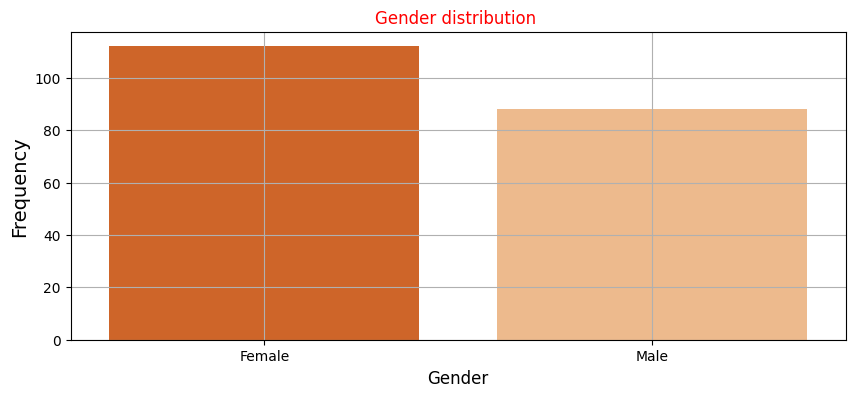

In [12]:
for feature in caterogical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=feature, hue=feature, palette="Oranges", order=df[feature].value_counts().index, legend=False)
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

* `Gender is nearly balanced, with a slight majority of females.`

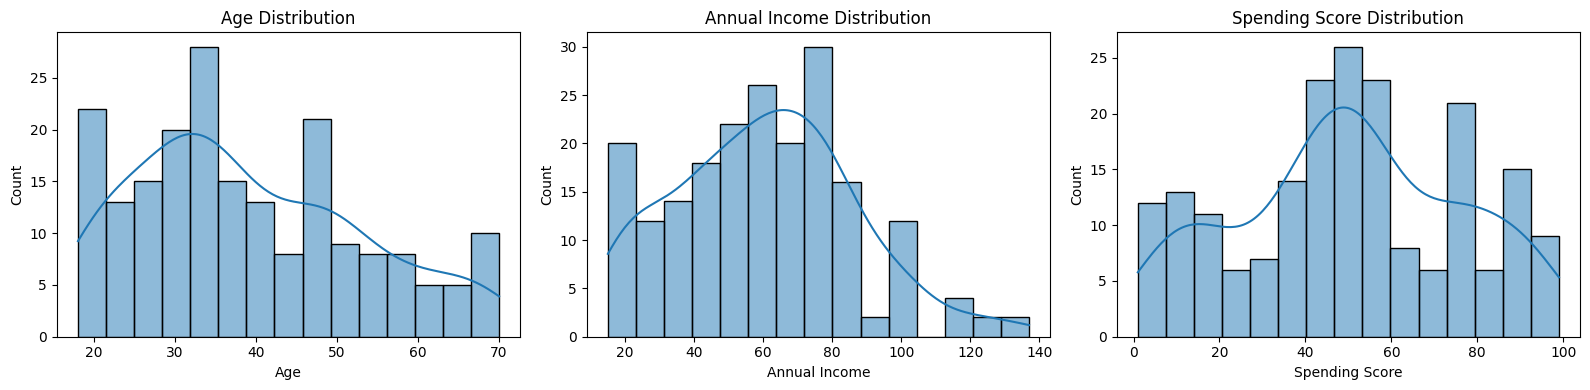

In [13]:
plt.figure(figsize=(16,4))
for i, col in enumerate(['Age', 'Annual Income', 'Spending Score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

* `Most customers are young adults; income and spending are widely spread.`

## Bivariate analysis

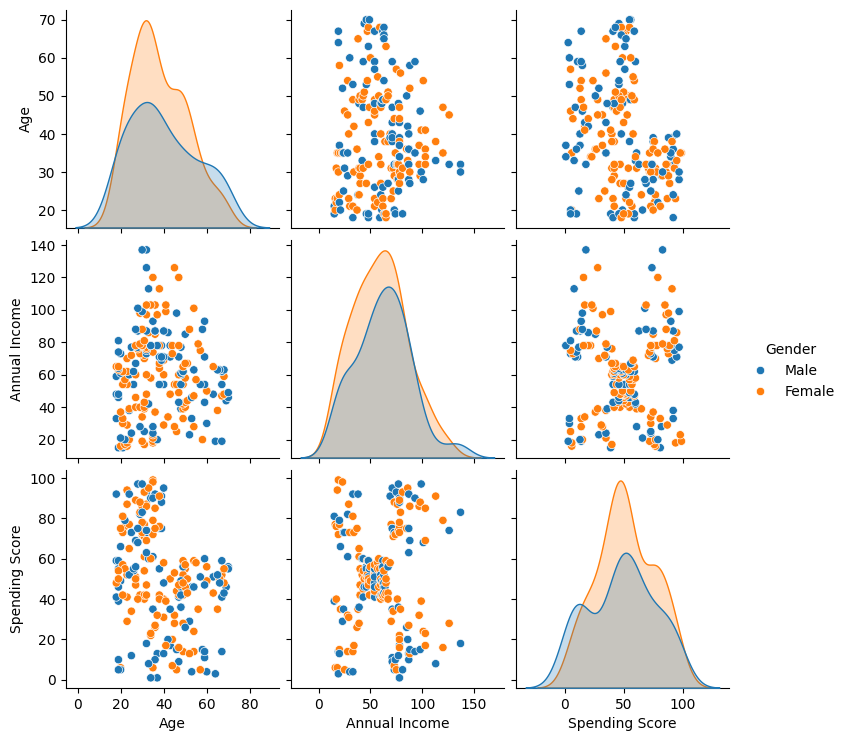

In [14]:
sns.pairplot(df, vars=['Age','Annual Income','Spending Score'], hue='Gender', height=2.5)
plt.show()

* `Spending does not depend strictly on income or age. There's a variety of behaviors.`

# Data preprocessing 

In [15]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [16]:
scaler = StandardScaler()
features = ['Age','Annual Income','Spending Score']
X_scaled = scaler.fit_transform(df[features])

In [17]:
pd.DataFrame(X_scaled)

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


# Buliding Models

# K-means

In [18]:
inertias=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

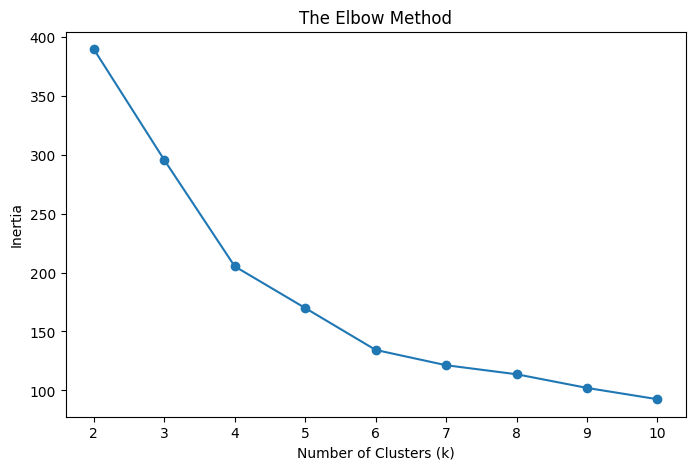

In [19]:
fig = plt.subplots(figsize=(8, 5))
color = 'tab:blue'
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.plot(range(2,11), inertias, 'o-',label='Inertia (Elbow)')
plt.tick_params(axis='y')

* `From the graph the optimal K=6`

In [20]:
km = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = km.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil:.3f}")

Silhouette Score: 0.431


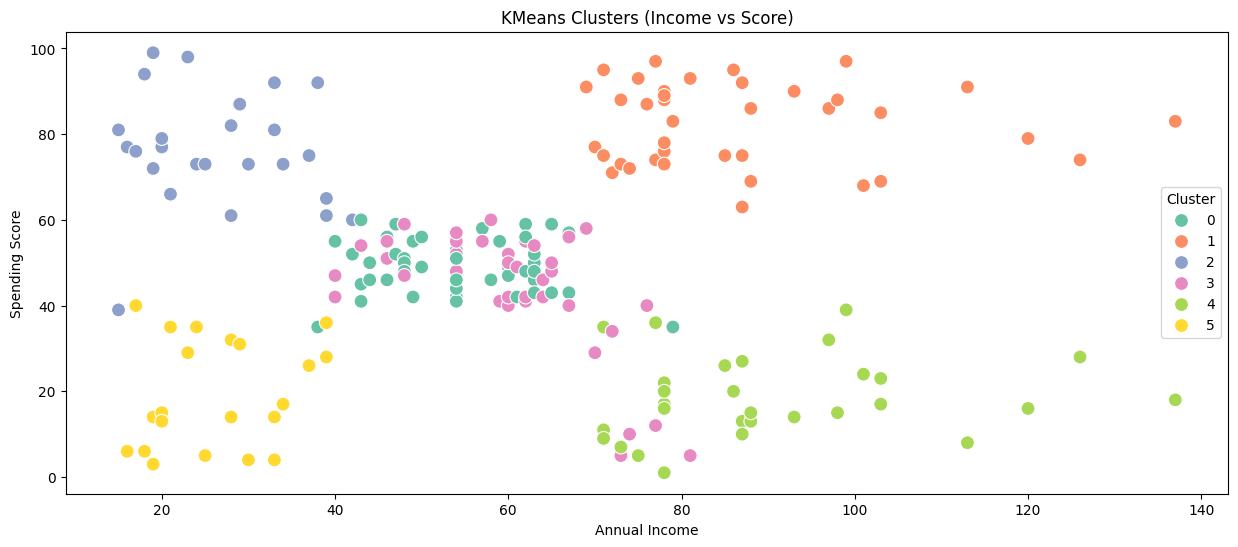

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Annual Income', y='Spending Score',
                hue='Cluster', palette='Set2', data=df, s=100)
plt.title('KMeans Clusters (Income vs Score)')
plt.show()

# Bonus

# DBSCAN

In [33]:
dbscan = DBSCAN(eps=.6, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)

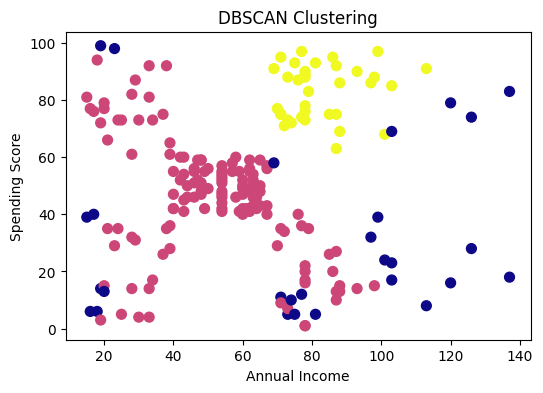

In [34]:
# Visualize clusters using Annual Income vs Spending Score
plt.figure(figsize=(6,4))
plt.scatter(df['Annual Income'], df['Spending Score'],
            c=df['Cluster'], cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [35]:
print(df['Cluster'].value_counts())

Cluster
 0    137
 1     35
-1     28
Name: count, dtype: int64


based on these results K-means model is better than DBSCAN in this task